In [1]:
# Install required libraries if not already installed
!pip install pandas scikit-learn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

# Load the Excel file
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)


Saving updated_blood_glucose_dataset.xlsx to updated_blood_glucose_dataset.xlsx


In [ ]:
ded = files.upload()

# Load the Excel file
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)


In [3]:
# Display dataset structure
print("Columns in the dataset:", df.columns)
df.head()


Columns in the dataset: Index(['Blood Glucose Levels (mg/dl)', 'Physically Active Status',
       'BMI (kg/m²)', 'Insulin Values (µU/mL)', 'Age (years)',
       'Dietary Habits', 'Family History of Diabetes', 'Blood Pressure (mmHg)',
       'HbA1c (%)', 'Cholesterol Levels (mg/dl)', 'Insulin Dosage(units)'],
      dtype='object')


,Blood Glucose Levels (mg/dl),Physically Active Status,BMI (kg/m²),Insulin Values (µU/mL),Age (years),Dietary Habits,Family History of Diabetes,Blood Pressure (mmHg),HbA1c (%),Cholesterol Levels (mg/dl),Insulin Dosage(units)
0,233,No,31.3,19.3,26,High-Carb,Yes,139/76,6.5,289,4
1,310,No,19.9,14.7,62,High-Carb,No,159/77,5.9,204,8
2,223,Yes,18.8,27.8,63,Low-Carb,Yes,155/77,9.7,200,4
3,145,Yes,24.1,47.9,59,Balanced,No,111/95,8.5,251,2
4,237,No,18.6,23.8,49,Balanced,No,139/76,5.7,178,4


In [4]:
# Split the Blood Pressure column into Systolic and Diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure (mmHg)'].str.split('/', expand=True).astype(float)

# Drop the original column
df = df.drop(columns=['Blood Pressure (mmHg)'])


In [5]:
# Encode categorical columns
categorical_cols = ['Physically Active Status', 'Dietary Habits', 'Family History of Diabetes']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])


In [6]:
# Split the data into features and target
X = df.drop(columns=['Insulin Dosage(units)'])
y = df['Insulin Dosage(units)']


In [7]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

In [10]:
# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.74
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           2       0.56      0.68      0.61        28
           3       0.50      0.52      0.51        31
           4       0.75      0.77      0.76        43
           6       0.86      0.82      0.84        44
           8       0.91      0.96      0.93        45

    accuracy                           0.74       200
   macro avg       0.76      0.64      0.64       200
weighted avg       0.76      0.74      0.73       200



In [11]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.945
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           2       0.88      0.82      0.85        28
           3       0.82      1.00      0.90        31
           4       1.00      0.98      0.99        43
           6       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        45

    accuracy                           0.94       200
   macro avg       0.92      0.87      0.89       200
weighted avg       0.95      0.94      0.94       200



In [13]:
# Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)



MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)

In [14]:
# Make predictions and evaluate
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.86
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           2       0.74      0.61      0.67        28
           3       0.72      1.00      0.84        31
           4       0.93      0.88      0.90        43
           6       0.95      0.89      0.92        44
           8       0.96      0.98      0.97        45

    accuracy                           0.86       200
   macro avg       0.80      0.78      0.78       200
weighted avg       0.86      0.86      0.86       200



In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}

# Perform grid search
grid_svm = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=3)
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_svm.best_params_)


Best Parameters for SVM: {'C': 10, 'gamma': 'scale'}


In [16]:
# Define parameter grid
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Perform grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


In [17]:
# Retrain SVM with best parameters
best_svm = SVC(kernel='rbf', C=grid_svm.best_params_['C'], gamma=grid_svm.best_params_['gamma'], random_state=42)
best_svm.fit(X_train, y_train)

y_pred_best_svm = best_svm.predict(X_test)
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_best_svm))


Tuned SVM Accuracy: 0.79


In [18]:
# Retrain Random Forest with best parameters
best_rf = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'],
                                  max_depth=grid_rf.best_params_['max_depth'], random_state=42)
best_rf.fit(X_train, y_train)

y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Tuned Random Forest Accuracy: 0.96


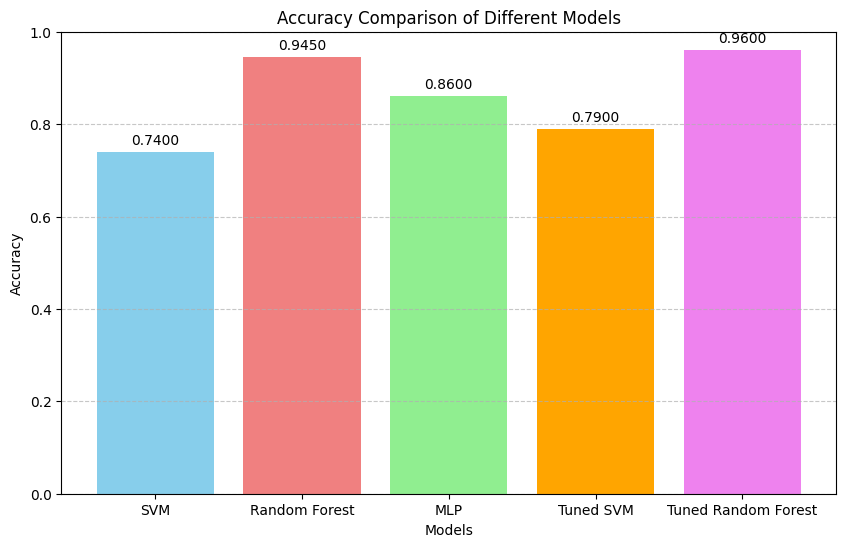

In [19]:

import matplotlib.pyplot as plt
# Accuracy scores
svm_accuracy = accuracy_score(y_test, y_pred_svm)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
tuned_svm_accuracy = accuracy_score(y_test, y_pred_best_svm)
tuned_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)

models = ['SVM', 'Random Forest', 'MLP', 'Tuned SVM', 'Tuned Random Forest']
accuracy_scores = [svm_accuracy, rf_accuracy, mlp_accuracy, tuned_svm_accuracy, tuned_rf_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1.0)  # Set y-axis limit to 0-1
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=10)

plt.show()

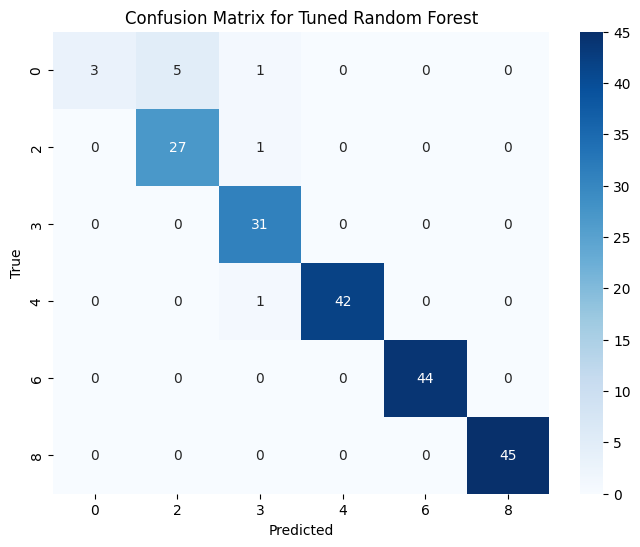

In [20]:
#

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred_best_rf are defined from your previous code

# Calculate the confusion matrix for the tuned random forest model
cm = confusion_matrix(y_test, y_pred_best_rf)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Tuned Random Forest")
plt.show()

In [21]:
!pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.8 MB/s eta 0:00:00


In [22]:
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score
import random


In [23]:
def fitness_function(params):
    """
    Fitness function to evaluate SVM accuracy.
    Handles invalid parameter configurations.
    """
    C, gamma = params

    # Ensure parameters are valid
    if C <= 0 or gamma <= 0:
        return 0,  # Return a very low score for invalid configurations

    try:
        # Create an SVM model with given parameters
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)

        # Perform 3-fold cross-validation
        accuracy = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
        return accuracy,  # GA expects a tuple
    except Exception as e:
        # If any error occurs, assign a low fitness value
        print(f"Invalid parameters: C={C}, gamma={gamma}. Error: {e}")
        return 0,


In [24]:
# Define the GA environment
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize accuracy
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0.1, 10)  # Range for C and gamma
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # Two parameters
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the evaluation, crossover, mutation, and selection methods
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Define a custom mutation function to ensure gamma stays within the valid range
def custom_mutation(individual, mu, sigma, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
            # Ensure gamma (index 1) is non-negative
            if i == 1:
                individual[i] = max(0.0, individual[i])
    return individual,

toolbox.register("mutate", custom_mutation, mu=0, sigma=1, indpb=0.2) # Use the custom mutation
toolbox.register("select", tools.selTournament, tournsize=3)

In [25]:
# Initialize the population
population = toolbox.population(n=20)  # Population size

# Set parameters for the Genetic Algorithm
n_generations = 30  # Number of generations
mutation_prob = 0.2  # Probability of mutation
crossover_prob = 0.5  # Probability of crossover

# Run the GA
for gen in range(n_generations):
    # Evaluate all individuals
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Select the next generation
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover and mutation
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < crossover_prob:
            toolbox.mate(child1, child2)
            del child1.fitness.values, child2.fitness.values

    for mutant in offspring:
        if random.random() < mutation_prob:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate invalid individuals
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace population with offspring
    population[:] = offspring

# Best individual after GA
best_individual = tools.selBest(population, k=1)[0]
print("Best Hyperparameters (C, gamma):", best_individual)


Best Hyperparameters (C, gamma): [8.121722950516574, 0.013023444641914699]


In [26]:
# Retrain SVM with the best parameters from GA
optimized_svm = SVC(kernel='rbf', C=best_individual[0], gamma=best_individual[1], random_state=42)
optimized_svm.fit(X_train, y_train)

# Evaluate
y_pred_ga_svm = optimized_svm.predict(X_test)
print("GA-Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_ga_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_ga_svm))


GA-Optimized SVM Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           2       0.76      0.93      0.84        28
           3       0.88      0.97      0.92        31
           4       0.97      0.88      0.93        43
           6       0.95      0.93      0.94        44
           8       0.96      1.00      0.98        45

    accuracy                           0.91       200
   macro avg       0.87      0.82      0.82       200
weighted avg       0.91      0.91      0.90       200



In [32]:
import ipywidgets as widgets
from IPython.display import display



# Example usage (replace with your actual data):
# Create sliders for input features
age_slider = widgets.IntSlider(min=18, max=80, step=1, description="Age:", value=30)
weight_slider = widgets.FloatSlider(min=40.0, max=150.0, step=0.1, description="Weight (kg):", value=70)
height_slider = widgets.FloatSlider(min=140.0, max=200.0, step=0.1, description="Height (cm):", value=170)
blood_glucose_slider = widgets.IntSlider(min=50, max=400, step=1, description="Blood Glucose (mg/dl):", value=100)
hba1c_slider = widgets.FloatSlider(min=4.0, max=12.0, step=0.1, description="HbA1c:", value=6.0)

# Example: Assuming you have "Physically Active Status" as a categorical variable
physical_activity = widgets.Dropdown(
    options=['Yes', 'No'],
    value='Yes',
    description='Physically Active:'
)

# Example: Assuming you have "Dietary Habits" as a categorical variable
dietary_habits = widgets.Dropdown(
    options=['Low-Carb', 'High-Carb','Balanced'],
    value='High-Carb',
    description='Dietary Habits:'
)


# Example for "Family History of Diabetes"
family_history = widgets.Dropdown(
    options=['Yes', 'No'],
    value='No',
    description='Family History:'
)

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict Insulin Dosage")


# Function to be executed when the button is clicked
def on_predict_button_clicked(b):
    # Collect values from widgets
    input_data = {
        'Age (years)': age_slider.value,
        'Weight (kg)': weight_slider.value,
        'Height (cm)': height_slider.value,
        'Blood Glucose (mg/dl)': blood_glucose_slider.value,
        'HbA1c': hba1c_slider.value,
        'Physically Active Status': physical_activity.value,
        'Dietary Habits': dietary_habits.value,
        'Family History of Diabetes': family_history.value,
        # ... Add ALL other input values from widgets to match training data
        # ... Add ALL necessary features to input_data, with correct names
    }

    # Convert categorical inputs to numerical using the same LabelEncoder as in training
    for col in ['Physically Active Status', 'Dietary Habits', 'Family History of Diabetes']:
        input_data[col] = label_encoders[col].transform([input_data[col]])[0]

    # Create DataFrame with correct column order
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Impute NaN values if any
    for col in input_df.columns:
        if input_df[col].isnull().any():
            input_df[col] = input_df[col].fillna(X[col].mean())

    # Scale input features using the same scaler from training
    input_scaled = scaler.transform(input_df)

    # Make prediction - using the best performing model from your code (e.g., best_svm)
    prediction = best_svm.predict(input_scaled)

    print(f"Predicted Insulin Dosage: {prediction[0]} units")
# Link button click to prediction function
predict_button.on_click(on_predict_button_clicked)
# Display all widgets
display(age_slider, weight_slider, height_slider, blood_glucose_slider, hba1c_slider, physical_activity, dietary_habits, family_history, predict_button)

IntSlider(value=30, description='Age:', max=80, min=18)

FloatSlider(value=70.0, description='Weight (kg):', max=150.0, min=40.0)

FloatSlider(value=170.0, description='Height (cm):', max=200.0, min=140.0)

IntSlider(value=100, description='Blood Glucose (mg/dl):', max=400, min=50)

FloatSlider(value=6.0, description='HbA1c:', max=12.0, min=4.0)

Dropdown(description='Physically Active:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Dietary Habits:', index=1, options=('Low-Carb', 'High-Carb', 'Balanced'), value='High-Ca…

Dropdown(description='Family History:', index=1, options=('Yes', 'No'), value='No')

Button(description='Predict Insulin Dosage', style=ButtonStyle())

Predicted Insulin Dosage: 4 units
